**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**View files**

In [3]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_comparison", txt_folder)
txt_fname  = "result.comparison.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/result.comparison.encode_chromatin_states.coverage.fcc.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/result.comparison.tss_essential.coverage.crispri_growth.tsv 


## Import data

In [4]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_comparison", txt_folder)
    txt_fname = "result.comparison.encode_chromatin_states.coverage.fcc.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_annot_score_summary = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 204  11

$fcc_astarr_macs_input_union
[1] 204  11



Assay_Label,Annot_Label,Min,Ci95_Lw,Q1,Q2,Q3,Ci95_Up,Max,Mean,N
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ASTARR,Active TSS,0.5546350,0.5984198,0.646910,0.6683370,0.6915949,0.7341674,0.8013775,0.6688214,10159
ASTARR,Biv,-0.6259661,-0.5864678,-0.546476,-0.5291561,-0.5102939,-0.4750851,-0.4084481,-0.5291286,12367
ASTARR,Bivalent,-0.6259661,-0.5864678,-0.546476,-0.5291561,-0.5102939,-0.4750851,-0.4084481,-0.5291286,12367


## Get table

In [5]:
idx = "fcc_astarr_macs_input_overlap"
lst = lst_dat_annot_score_summary
dat = lst[[idx]]

dat_annot_score_summary = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 204  11


Assay_Label,Annot_Label,Min,Ci95_Lw,Q1,Q2,Q3,Ci95_Up,Max,Mean,N
ASTARR,Active TSS,0.5546350,0.5984198,0.6469100,0.6683370,0.6915949,0.7341674,0.8013775,0.6688214,10159
ASTARR,Biv,-0.6259661,-0.5864678,-0.5464760,-0.5291561,-0.5102939,-0.4750851,-0.4084481,-0.5291286,12367
ASTARR,Bivalent,-0.6259661,-0.5864678,-0.5464760,-0.5291561,-0.5102939,-0.4750851,-0.4084481,-0.5291286,12367
ASTARR,CA-CTCF,-0.1776395,-0.1413776,-0.1079071,-0.0933113,-0.0764365,-0.0456449,-0.0260159,-0.0930561,20916
ASTARR,CA-H3K4me3,-0.7373619,-0.7068918,-0.6660377,-0.6438639,-0.6194482,-0.5696775,-0.5359846,-0.6422300,3144
ASTARR,CA-only,-0.2361696,-0.1898321,-0.1591546,-0.1420829,-0.1240061,-0.0934096,-0.0597218,-0.1420406,1279


## Set plot style

In [6]:
### set text size
theme_text = theme(
    title        = element_text(size = 16),
    axis.title   = element_text(size = 16),
    axis.text    = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text  = element_text(size = 16),
    strip.text.x = element_text(size = 16)
)

### Set color scale
vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
vec_txt_color = c(
    "ASTARR" = "#fb8072", 
    "WSTARR" = "#80b1d3", 
    "TMPRA"  = "#8dd3c7", 
    "LMPRA"  = "#ff7f00",
    "CRISPRi-HCRFF"  = "#e78ac3", 
    "CRISPRi-Growth" = "#6a3d9a")

## Explore: FCC score summary across Chromatin States

### Init: set labels

In [78]:
### set labels for cCREs
vec_txt_label_ccres = c("PLS", "pELS", "dELS", "CA-H3K4me3", "CA-TF", "CA-CTCF", "CA-only", "Low-DNase")

In [79]:
### set labels for ChromHMM
vec_txt_label = c(
    "Tss"        = "Active TSS", 
    "TssFlnk"    = "Flanking TSS", 
    "TssFlnkD"   = "Flanking TSS", 
    "TssFlnkU"   = "Flanking TSS", 
    "Enh1"       = "Enhancer", 
    "Enh2"       = "Enhancer", 
    "EnhG1"      = "Enhancer in gene", 
    "EnhG2"      = "Enhancer in gene", 
    "Tx"         = "Transcription",
    "TxWk"       = "Weak transcription", 
    "Biv"        = "Bivalent",
    "ReprPC"     = "Repressed by Polycomb", 
    "ZNF/Rpts"   = "ZNF genes repeats",
    "Quies"      = "Quiescent", 
    "Het"        = "Heterochromatin")

vec_txt_label_chmm = unique(vec_txt_label)
vec_txt_label_chmm

[1] "Active TSS"            "Flanking TSS"          "Enhancer"             
 [4] "Enhancer in gene"      "Transcription"         "Weak transcription"   
 [7] "Bivalent"              "Repressed by Polycomb" "ZNF genes repeats"    
[10] "Quiescent"             "Heterochromatin"

### Explore: FCC scores across cCREs

**Try 01: Test**

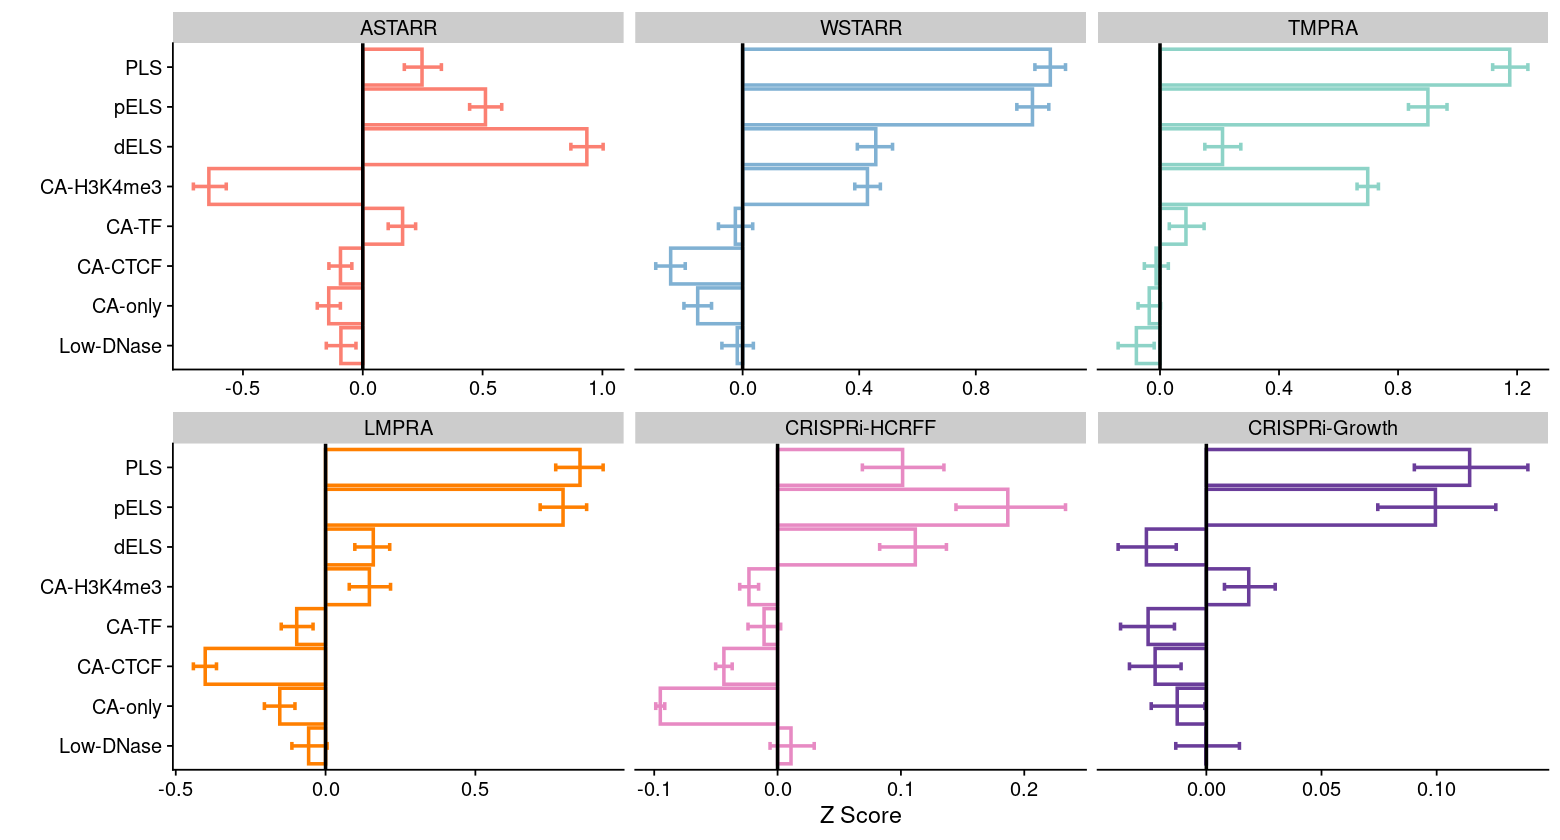

In [9]:
### init
vec_txt_label = vec_txt_label_ccres

### get table and set label/assay order
dat = dat_annot_score_summary
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::filter(Annot_Label %in% vec_txt_label) %>%
    dplyr::mutate(
        Assay_Label = factor(Assay_Label, levels=vec_txt_assay),
        Annot_Label = factor(Annot_Label, levels=rev(vec_txt_label))
    )

### generate plots
gpt = ggplot(dat) + 
    geom_col(
        aes(
            x     = Annot_Label, 
            y     = Mean,
            group = Assay_Label,
            color = Assay_Label
        ),
        position = "dodge",
        fill = "white",
        linewidth = 1
    ) +
    geom_errorbar(
        aes(
            x     = Annot_Label, 
            ymin  = Ci95_Lw, 
            ymax  = Ci95_Up,
            group = Assay_Label, 
            color = Assay_Label
           ), 
        width = 0.2,
        linewidth = 1
    ) +
    geom_hline(yintercept = 0, color="black", linewidth = 1) +
    labs(x="", y="Z Score") +
    scale_color_manual(values = vec_txt_color) +
    theme_cowplot() +
    coord_flip() +
    facet_wrap(~Assay_Label, nrow=2, scales = "free_x") +
    theme(legend.position = "None")

### show
options(repr.plot.height=7, repr.plot.width = 13)
print(gpt)

**Try 02: Update style**

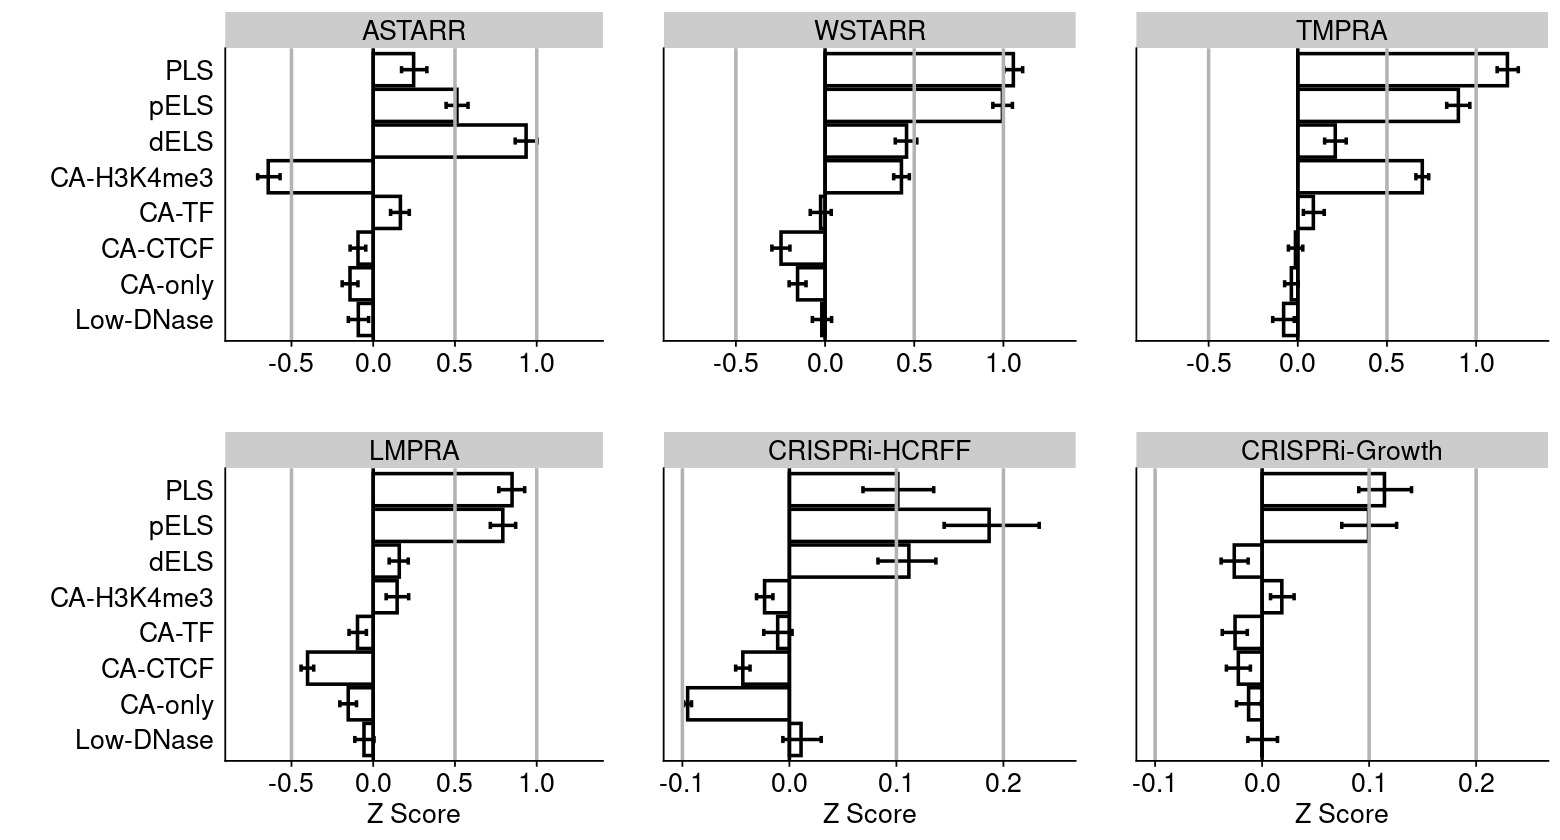

In [73]:
### init
vec_txt_label = vec_txt_label_ccres

### get table and set label/assay order
dat = dat_annot_score_summary
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::filter(Annot_Label %in% vec_txt_label) %>%
    dplyr::mutate(
        Assay_Label = factor(Assay_Label, levels=vec_txt_assay),
        Annot_Label = factor(Annot_Label, levels=rev(vec_txt_label))
    )

### split by chromstate and plot
lst = split(dat, dat$Assay_Label)
lst = lapply(lst, function(dat){
    ### generate plots
    gpt = ggplot(dat) + 
        geom_col(
            aes(
                x     = Annot_Label, 
                y     = Mean,
                group = Assay_Label,
                #color = Assay_Label
            ),
            position = "dodge",
            fill  = "white",
            color = "black",
            linewidth = 1
        ) +
        geom_errorbar(
            aes(
                x     = Annot_Label, 
                ymin  = Ci95_Lw, 
                ymax  = Ci95_Up,
                group = Assay_Label, 
                #color = Assay_Label
               ), 
            width = 0.2,
            color = "black",
            linewidth = 1
        ) +
        labs(x="", y="Z Score") +
        theme_cowplot() +
        theme_text +
        coord_flip() +
        facet_wrap(~Assay_Label, nrow=2, scales = "free_x") +
        theme(legend.position = "None")

    return(gpt)
})

### update style: remove label ticks
vec = vec_txt_assay
for (idx in vec){
    lst[[idx]] = lst[[idx]] + theme(axis.ticks.y = element_blank())
}

### update style: remove label text
vec = c("WSTARR", "WSTARR", "TMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
for (idx in vec){
    lst[[idx]] = lst[[idx]] + theme(axis.text.y  = element_blank())
}

### update style: remove axis text
vec = c("ASTARR", "WSTARR", "TMPRA")
for (idx in vec){
    lst[[idx]] = lst[[idx]] + labs(y = "")
}

### update style: add grid lines and set limit (STARR/MPRA)
vec = c("ASTARR", "WSTARR", "TMPRA", "LMPRA")
for (idx in vec){
    lst[[idx]] = lst[[idx]] + 
        geom_hline(yintercept = c(-0.5, 0.5, 1.0), color="grey70", linewidth = 1) +
        geom_hline(yintercept = 0, color="black", linewidth = 1) +
        ylim(-0.8, 1.3)
}

### update style: add grid lines and set limit (CRISPRi)
vec = c("CRISPRi-HCRFF", "CRISPRi-Growth")
for (idx in vec){
    lst[[idx]] = lst[[idx]] + 
        geom_hline(yintercept = c(-0.1, 0.1, 0.2), color="grey70", linewidth = 1) +
        geom_hline(yintercept = 0, color="black", linewidth = 1) +
        ylim(-0.1, 0.25)
}

### combine the final plot
plt = plot_grid(
    plotlist = lst, 
    nrow=2,
    rel_widths = c(1.3, 1, 1)
)

### assign and show
plt_export_ccres_bar_facet = plt
options(repr.plot.height=7, repr.plot.width = 13)
print(plt)

**Try 03**

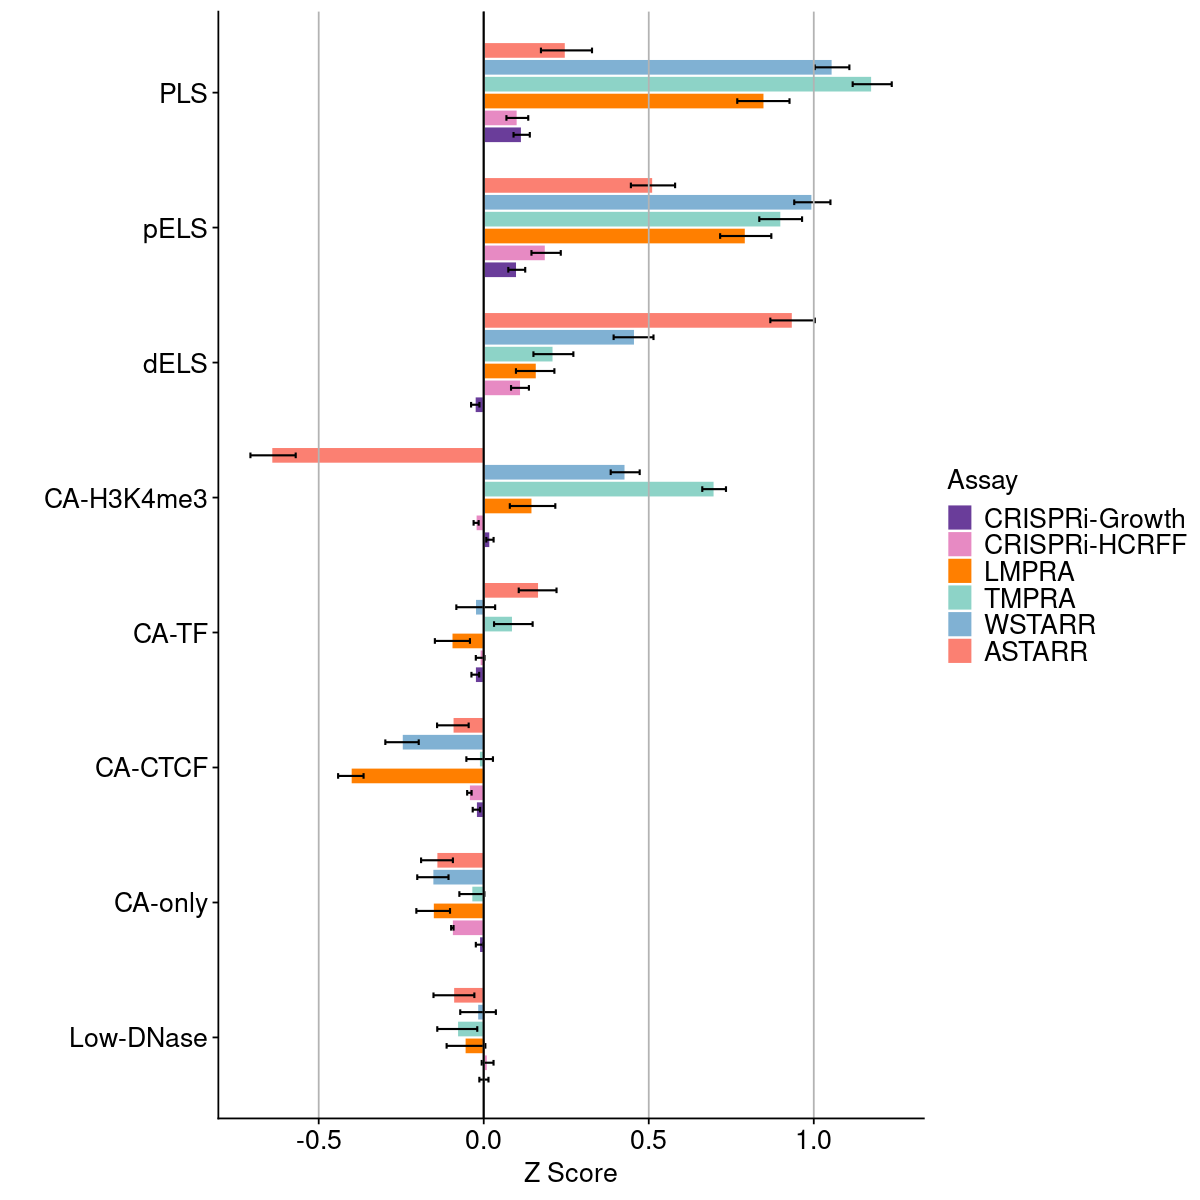

In [68]:
### init
vec_txt_label = vec_txt_label_ccres
dodge = position_dodge(width = 0.75)

### get table and set label order
dat = dat_annot_score_summary
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::filter(Annot_Label %in% vec_txt_label) %>%
    dplyr::mutate(
        Assay_Label = factor(Assay_Label, levels=rev(vec_txt_assay)),
        Annot_Label = factor(Annot_Label, levels=rev(vec_txt_label))
    )

### generate plot
gpt = ggplot(dat, aes(x = Annot_Label, y = Mean, fill = Assay_Label)) +
    geom_col(position = dodge, width = 0.7, color = "white", linewidth = 0.3) +
    geom_errorbar(
        aes(ymin = Ci95_Lw, ymax = Ci95_Up),
        position = dodge, width = 0.25, linewidth = 0.6
    ) +
    geom_hline(yintercept = 0, color = "black", linewidth = 0.6) +
    scale_fill_manual(values = vec_txt_color) +
    labs(x = "", y = "Z Score", fill = "Assay") +
    theme_cowplot() +
    theme(legend.position = "right") +
    theme_text +
    geom_hline(yintercept = seq(-0.5, 1.0, 0.5), color="grey70") +
    geom_hline(yintercept = 0,                   color="black") +
    coord_flip()

### assign and show
gpt_export_ccres_bar_dodge = gpt
options(repr.plot.height=10, repr.plot.width = 10)
print(gpt)

## Explore: FCC scores across ChromHMM

**Try 01**

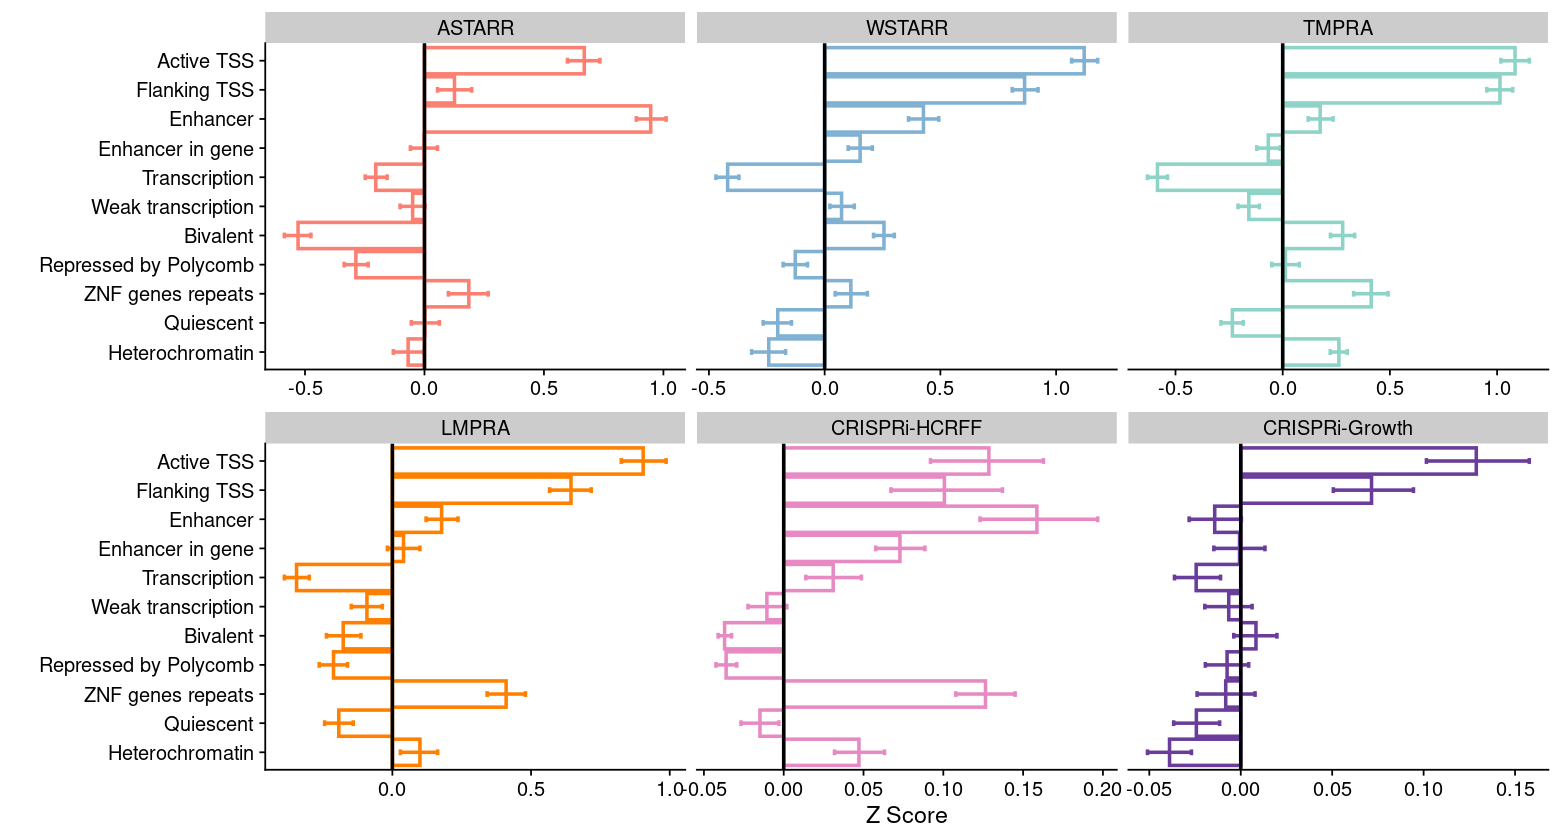

In [12]:
### init
vec_txt_label = vec_txt_label_chmm

### get table and set label/assay order
dat = dat_annot_score_summary
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::filter(Annot_Label %in% vec_txt_label) %>%
    dplyr::mutate(
        Assay_Label = factor(Assay_Label, levels=vec_txt_assay),
        Annot_Label = factor(Annot_Label, levels=rev(vec_txt_label))
    )

### generate plots
gpt = ggplot(dat) + 
    geom_col(
        aes(
            x     = Annot_Label, 
            y     = Mean,
            group = Assay_Label,
            color = Assay_Label
        ),
        position = "dodge",
        fill = "white",
        linewidth = 1
    ) +
    geom_errorbar(
        aes(
            x     = Annot_Label, 
            ymin  = Ci95_Lw, 
            ymax  = Ci95_Up,
            group = Assay_Label, 
            color = Assay_Label
           ), 
        width = 0.2,
        linewidth = 1
    ) +
    geom_hline(yintercept = 0, color="black", linewidth = 1) +
    labs(x="", y="Z Score") +
    scale_color_manual(values = vec_txt_color) +
    theme_cowplot() +
    coord_flip() +
    facet_wrap(~Assay_Label, nrow=2, scales = "free_x") +
    theme(legend.position = "None")

### assign and show
options(repr.plot.height=7, repr.plot.width = 13)
print(gpt)

**Try 02**

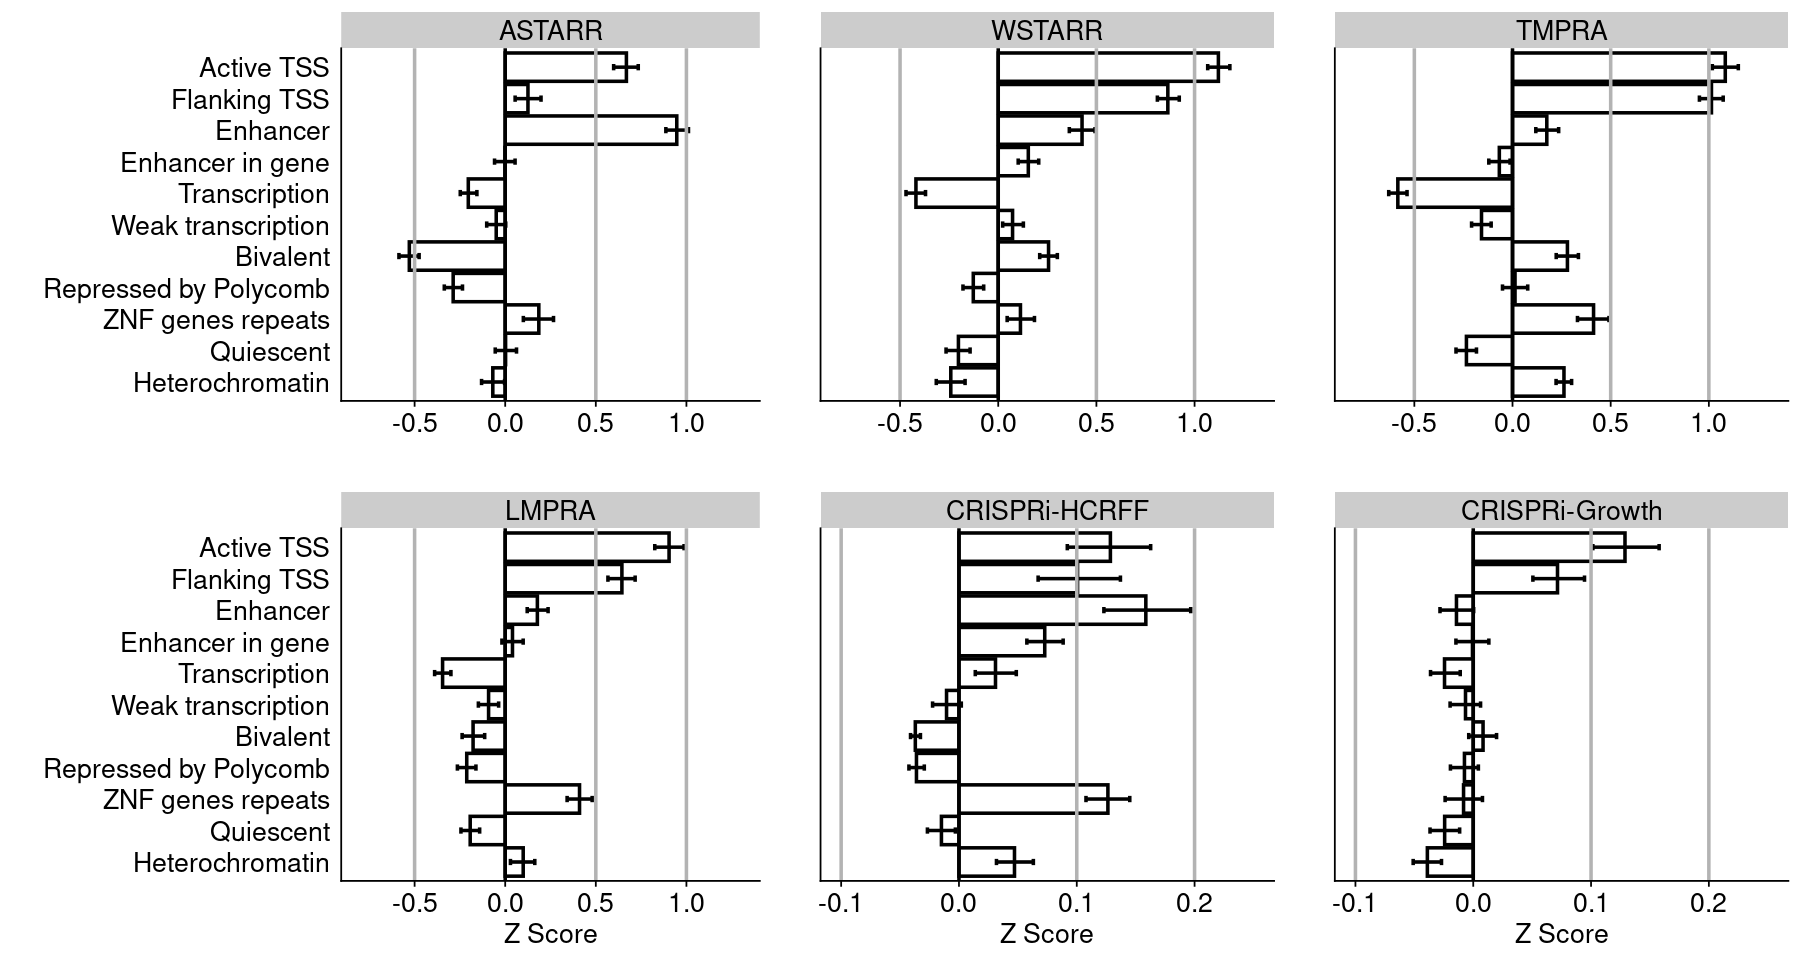

In [80]:
### init
vec_txt_label = vec_txt_label_chmm

### get table and set label/assay order
dat = dat_annot_score_summary
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::filter(Annot_Label %in% vec_txt_label) %>%
    dplyr::mutate(
        Assay_Label = factor(Assay_Label, levels=vec_txt_assay),
        Annot_Label = factor(Annot_Label, levels=rev(vec_txt_label))
    )

### split by chromstate and plot
lst = split(dat, dat$Assay_Label)
lst = lapply(lst, function(dat){
    ### generate plots
    gpt = ggplot(dat) + 
        geom_col(
            aes(
                x     = Annot_Label, 
                y     = Mean,
                group = Assay_Label,
                #color = Assay_Label
            ),
            position = "dodge",
            fill  = "white",
            color = "black",
            linewidth = 1
        ) +
        geom_errorbar(
            aes(
                x     = Annot_Label, 
                ymin  = Ci95_Lw, 
                ymax  = Ci95_Up,
                group = Assay_Label, 
                #color = Assay_Label
               ), 
            width = 0.2,
            color = "black",
            linewidth = 1
        ) +
        labs(x="", y="Z Score") +
        #scale_color_manual(values = vec_txt_color) +
        theme_cowplot() +
        theme_text +
        coord_flip() +
        facet_wrap(~Assay_Label, nrow=2, scales = "free_x") +
        theme(legend.position = "None")

    return(gpt)
})


### update style: remove label ticks
vec = vec_txt_assay
for (idx in vec){
    lst[[idx]] = lst[[idx]] + theme(axis.ticks.y = element_blank())
}

### update style: remove label text
vec = c("WSTARR", "WSTARR", "TMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
for (idx in vec){
    lst[[idx]] = lst[[idx]] + theme(axis.text.y  = element_blank())
}

### update style: remove axis text
vec = c("ASTARR", "WSTARR", "TMPRA")
for (idx in vec){
    lst[[idx]] = lst[[idx]] + labs(y = "")
}

### update style: add grid lines and set limit (STARR/MPRA)
vec = c("ASTARR", "WSTARR", "TMPRA", "LMPRA")
for (idx in vec){
    lst[[idx]] = lst[[idx]] + 
        geom_hline(yintercept = c(-0.5, 0.5, 1.0), color="grey70", linewidth = 1) +
        geom_hline(yintercept = 0, color="black", linewidth = 1) +
        ylim(-0.8, 1.3)
}

### update style: add grid lines and set limit (CRISPRi)
vec = c("CRISPRi-HCRFF", "CRISPRi-Growth")
for (idx in vec){
    lst[[idx]] = lst[[idx]] + 
        geom_hline(yintercept = c(-0.1, 0.1, 0.2), color="grey70", linewidth = 1) +
        geom_hline(yintercept = 0, color="black", linewidth = 1) +
        ylim(-0.1, 0.25)
}

### combine the final plot
plt = plot_grid(
    plotlist = lst, 
    nrow=2,
    rel_widths = c(1.5, 1, 1)
)

### assign and show
plt_export_chmm_bar_facet = plt
options(repr.plot.height=8, repr.plot.width = 15)
print(plt)

**Try 03**

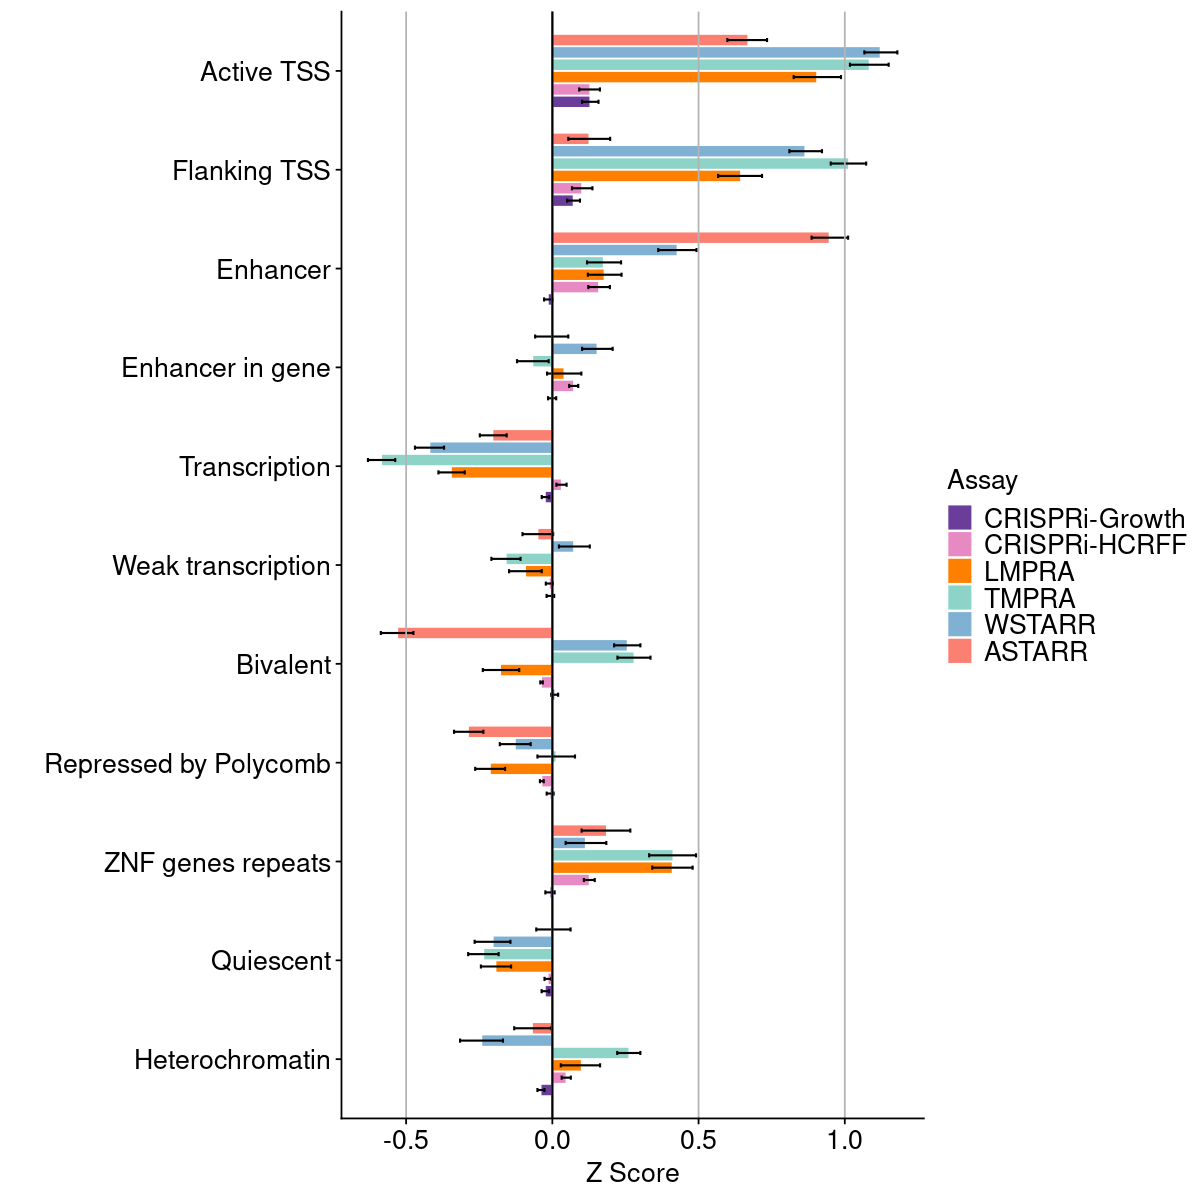

In [81]:
### init
vec_txt_label = vec_txt_label_chmm
dodge = position_dodge(width = 0.75)

### get table and set label order
dat = dat_annot_score_summary
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::filter(Annot_Label %in% vec_txt_label) %>%
    dplyr::mutate(
        Assay_Label = factor(Assay_Label, levels=rev(vec_txt_assay)),
        Annot_Label = factor(Annot_Label, levels=rev(vec_txt_label))
    )

### generate plot
gpt = ggplot(dat, aes(x = Annot_Label, y = Mean, fill = Assay_Label)) +
    geom_col(position = dodge, width = 0.7, color = "white", linewidth = 0.3) +
    geom_errorbar(
        aes(ymin = Ci95_Lw, ymax = Ci95_Up),
        position = dodge, width = 0.25, linewidth = 0.6
    ) +
    geom_hline(yintercept = 0, color = "black", linewidth = 0.6) +
    scale_fill_manual(values = vec_txt_color) +
    labs(x = "", y = "Z Score", fill = "Assay") +
    theme_cowplot() +
    theme(legend.position = "right") +
    theme_text +
    geom_hline(yintercept = seq(-0.5, 1.0, 0.5), color="grey70") +
    geom_hline(yintercept = 0,                   color="black") +
    coord_flip()

### assign and show
gpt_export_chmm_bar_dodge = gpt
options(repr.plot.height=10, repr.plot.width = 10)
print(gpt)

## Export

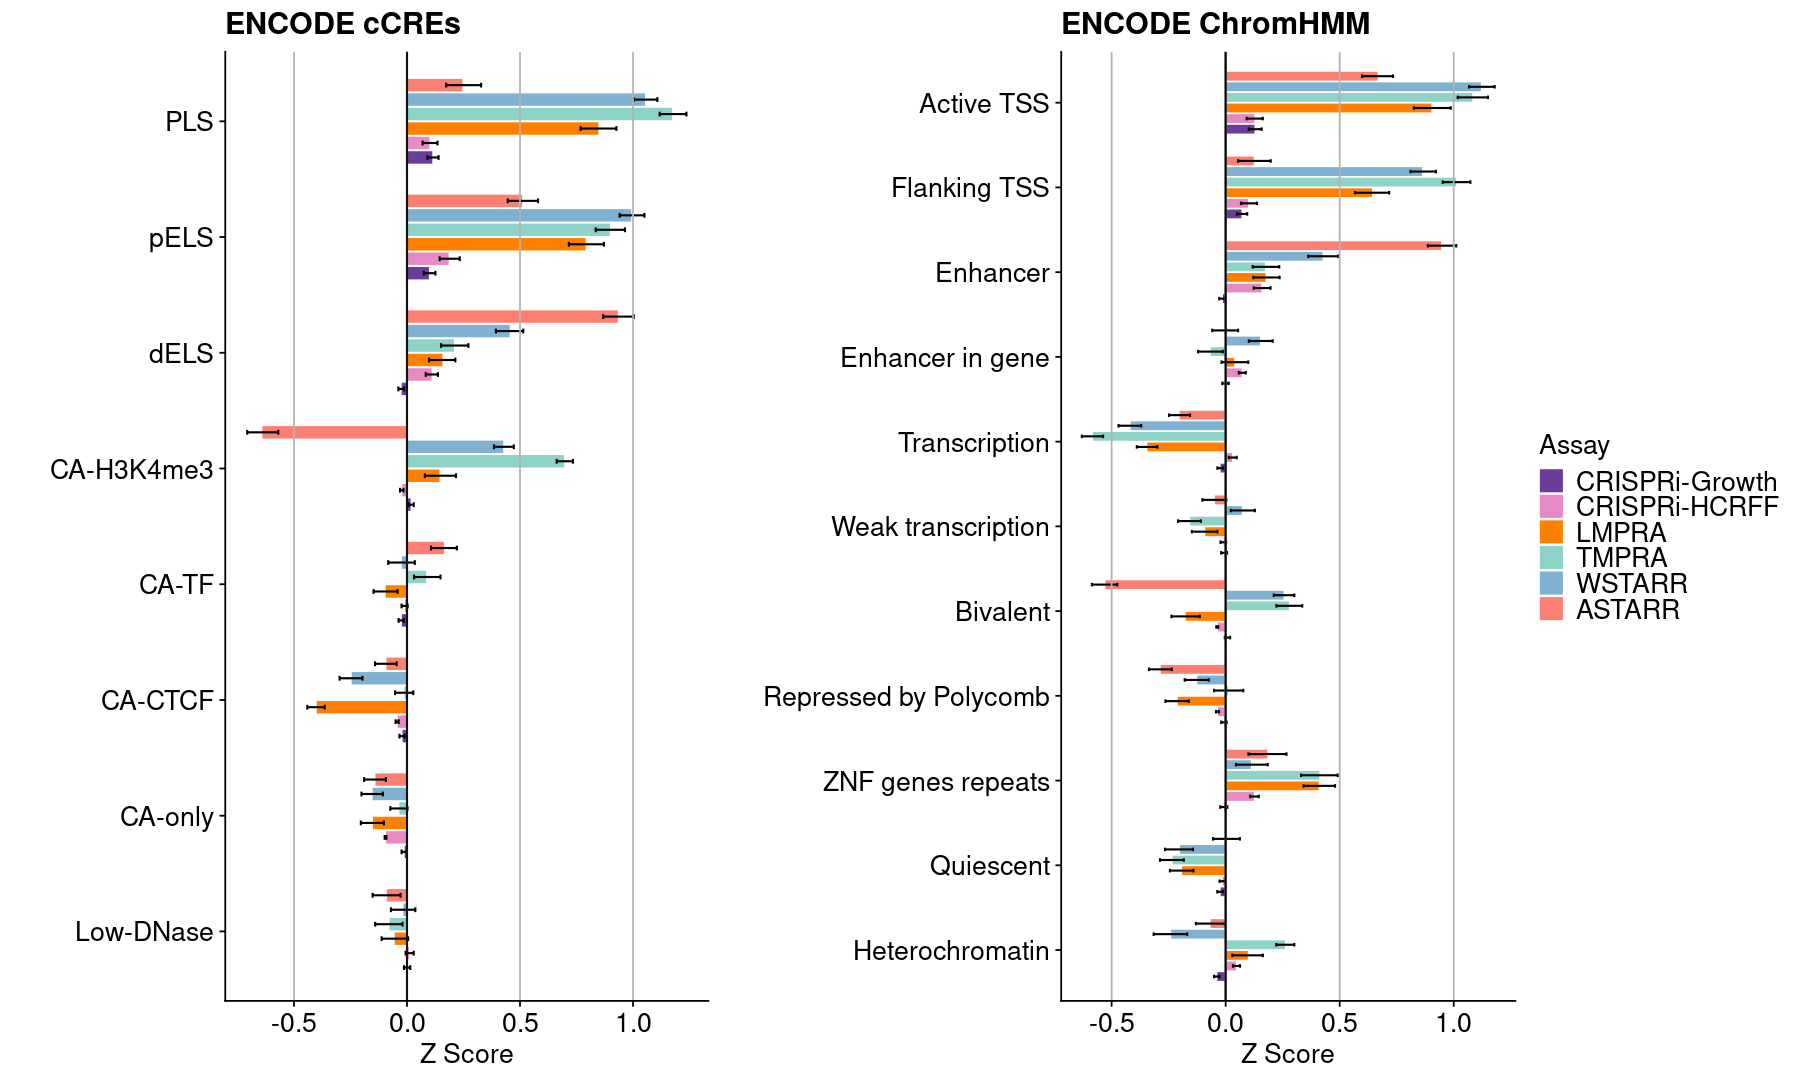

In [82]:
lst = list(
    gpt_export_ccres_bar_dodge + 
        labs(title = "ENCODE cCREs") +
        theme(legend.position = "none"),
    gpt_export_chmm_bar_dodge + 
        labs(title = "ENCODE ChromHMM")
)

vec = c(2, 3)
plt = plot_grid(
    plotlist   = lst,
    rel_widths = vec,
    nrow = 1
)

### assign and show
plt_export_merge_bar_dodge = plt
options(repr.plot.height=9, repr.plot.width = 15)
print(plt)

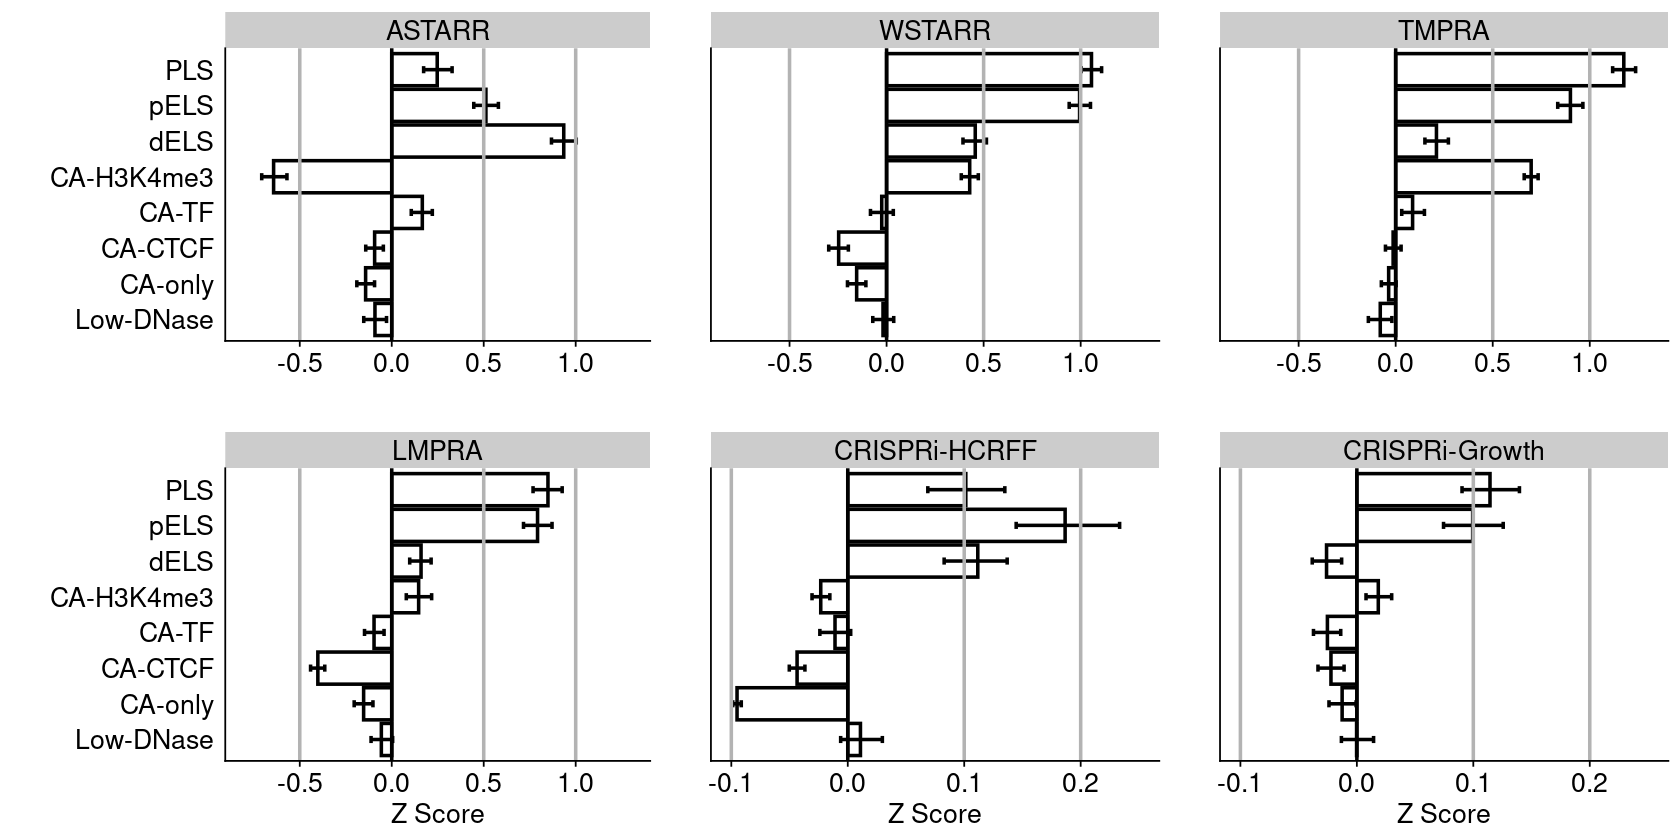

In [83]:
plt = plt_export_ccres_bar_facet
options(repr.plot.height=7, repr.plot.width = 14)
print(plt)

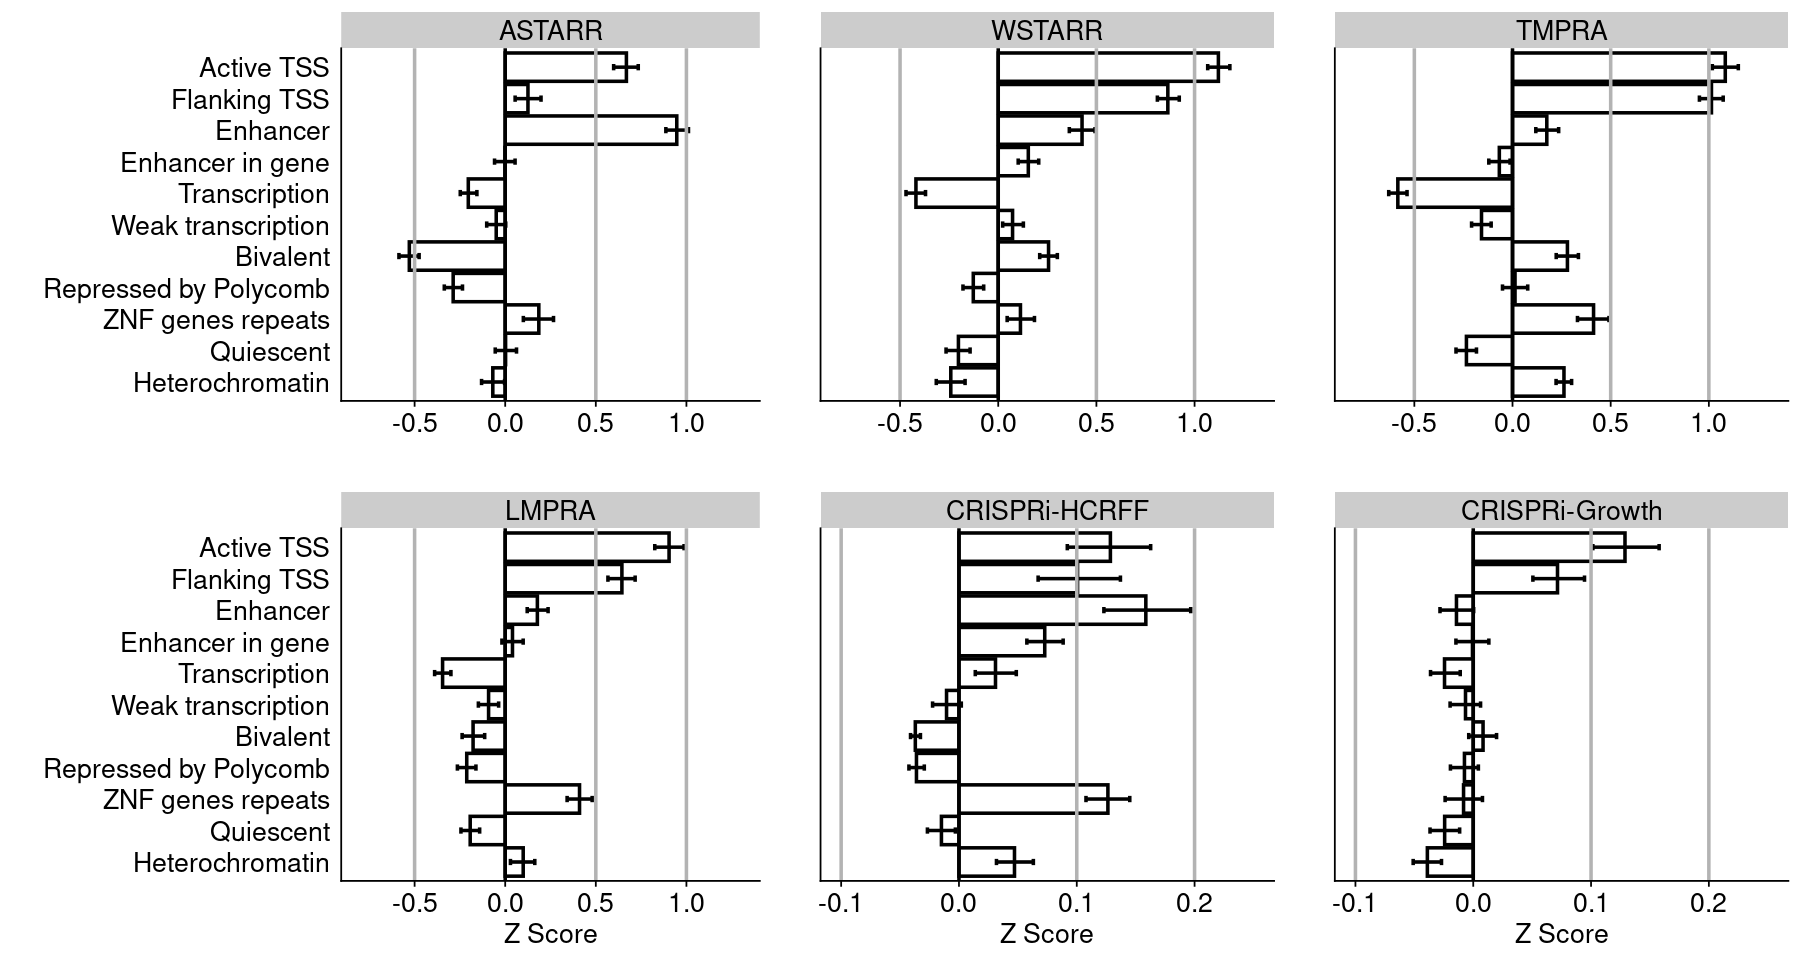

In [84]:
plt = plt_export_chmm_bar_facet
options(repr.plot.height=8, repr.plot.width = 15)
print(plt)

**Export plots**

In [85]:
plt_export = plt_export_merge_bar_dodge
txt_export = "fig.fcc_comparison.encode_chromatin_states.merge.coverage.fcc.barplot"
num_height = 9
num_width  = 15

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

In [86]:
plt_export = plt_export_ccres_bar_facet
txt_export = "fig.fcc_comparison.encode_chromatin_states.ccres.coverage.fcc.barplot"
num_height = 7
num_width  = 14

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

In [87]:
plt_export = plt_export_chmm_bar_facet
txt_export = "fig.fcc_comparison.encode_chromatin_states.chromhmm.coverage.fcc.barplot"
num_height = 8
num_width  = 15

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")